In [1]:
import numpy as np

In [2]:
from scipy.integrate import odeint

In [3]:
import matplotlib.pyplot as plt

In [4]:
#defining the parameters and functions we will be using in odeint() 

#Read https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html for more info

def f(y, t, params):
    theta, omega = y #the two values we are differentiating
    mu, g = params #set parameters in the equations
    derivs = [omega, mu*g*np.sin(theta) - mu*(omega**2) - g*np.cos(theta)]
    #this is both the FOE equations, dtheta/dt = w (first term), and dw/dt = the second term
    
    return derivs

In [5]:
mu = 0.2 #sliding friction coeff
g = 9.8 #gravity
R = 1 #we will never use this since it's 1, but for ease of understanding and option to tinker, we leave it here
#If you want to use R, change the FOEs in cell 4 to plug in R where necessary, and add as parameters

In [6]:
theta0 = 1.35 #initial angle. We are using a little less than pi/2 due to the comp error of friction pushing in the opp.
                #direction and causing the theta to increase rather than decrease (sliding to the left, not right)
omega0 = 0.0 #initial angular momentum

In [7]:
params = [mu, g] #to plug into f

In [8]:
y0 = [theta0, omega0] #to plug into odeint

In [9]:
tStop = 1.5 #time at which to stop, otherwise will be cyclical and show several rotations
tStep = 0.00001 #time step delta t

In [10]:
t = np.arange(0., tStop, tStep) #create array of t's starting from 0 till tStop, incrementing tStep each time

In [11]:
psoln = odeint(f, y0, t, args=(params,)) #solve the ODE

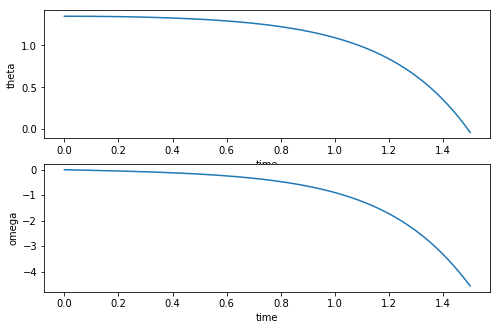

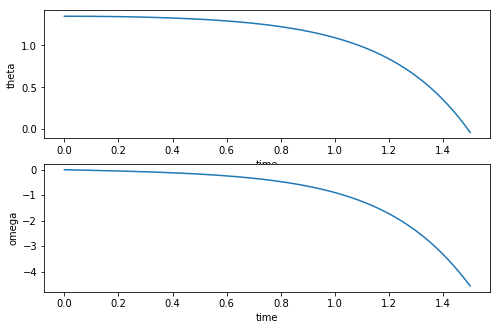

In [12]:
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')
#plot theta vs. time

ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')
#plot omega vs. time
fig
#does everything look right?

In [13]:
thetaList = psoln[:,0]
omegaList = psoln[:,1]
#Create separate lists out of the thetas and omegas to iterate through without worrying about destroying info

In [14]:
N = []
#empty list to store N values
for idx, each in enumerate(thetaList):
    val = np.sin(each) - (omegaList[idx]**2)/g
    #check which theta values are closest to N being 0
    if val < 0.0001 and val >-0.0001:
        print(each)
    N.append(val)

0.6328827008178373
0.6328586266198936
0.6328345516317457
0.6328104758533674


Text(0, 0.5, 'N')

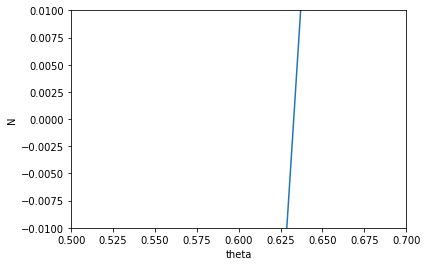

In [15]:
fig2 = plt.plot(thetaList, N)
#limit N to just around 0
plt.ylim([-0.01,0.01])
#limit theta to just around the values listed in cell 138
plt.xlim([0.5,0.7])
plt.xlabel('theta')
plt.ylabel('N')

In [ ]:
#in this case our theta is 0.625 Radians, or 36.2 degrees.